In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib import cm
from scipy import stats

#### Data: https://eci.gov.in/

The difference exists as in specific cases, EVM count was not done due to technical reasons and the margin of victory was substaintially higher than the difference in each such case.

The final authentic data is published after the receipt of the Signed copy of the index card from the Returning Officers
Data Obtained from https://eci.gov.in/ for research purposes.

In [60]:

# Task 1: Clean the data
votes_df = pd.read_csv("Votes_2019.csv")
votes_df.dropna(inplace=True) # Remove any missing or null values
# votes_df = votes_df[(votes_df.total_actual_votes >= 0) & (votes_df.total_actual_votes <= votes_df.total_electors)] # Remove any outliers or inconsistencies in the data
# votes_df = votes_df[(votes_df.total_actual_votes >= 0) & (votes_df.total_actual_votes <= 1000000)] # Remove any outliers or inconsistencies in the data


votes_df.head() # Display the first 5 rows of the data


,state_name,total_electors,total_actual_votes,male_voters,female_voters,other_voters,total_voters,evm_vote,postal_vote,migrant_vote
0,Andaman & Nicobar Islands,317878,207296,109407,97671,2,207080,207080,216,0
1,Andhra Pradesh,39345717,31607242,15567765,15818150,709,31386624,31380829,226413,0
2,Arunachal Pradesh,798249,652091,300798,326179,0,626977,626977,25114,0
3,Assam,21991112,17986066,9184449,8748413,23,17932885,17932885,53181,0
4,Bihar,71063555,40805297,20688548,19978743,53,40667344,40667344,137953,0


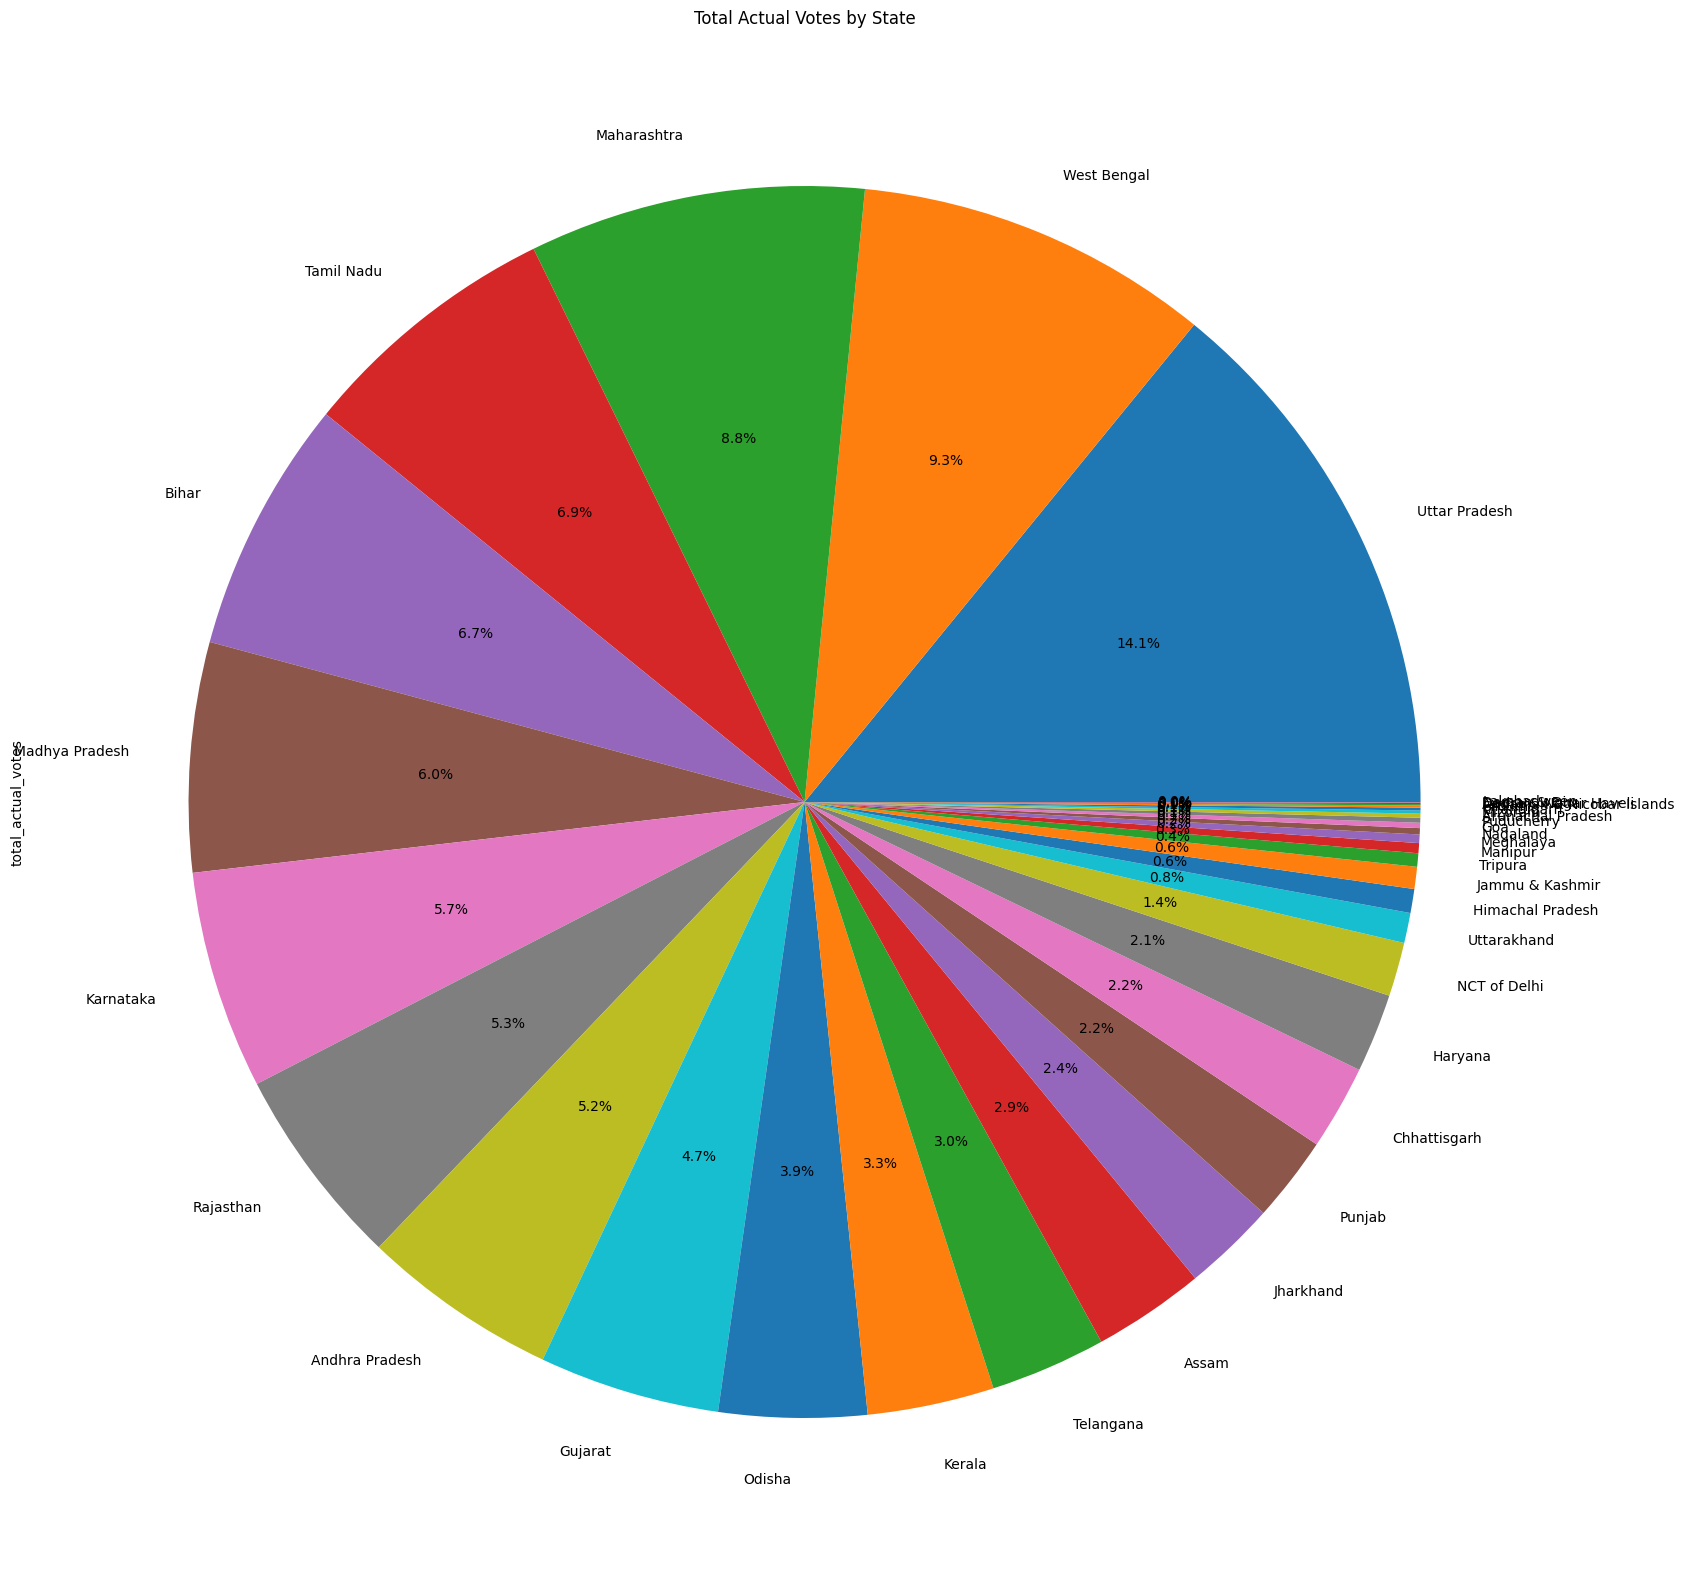

In [61]:

# Task 2: Visualize the total actual votes distributed in different states using a pie chart

votes_by_state = votes_df.groupby('state_name').total_actual_votes.sum()
#sort ascending
votes_by_state = votes_by_state.sort_values(ascending=False)

# Set the figure size
plt.figure(figsize=(20, 20))

# Create the pie chart
votes_by_state.plot(kind='pie', title='Total Actual Votes by State', autopct='%1.1f%%')

# Show the chart
plt.show()



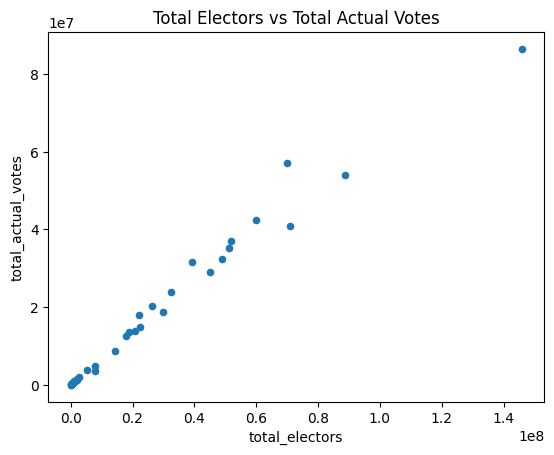

In [62]:

# Task 4: Analyze the corelationship between total electors and total actual votes. Create a scatter plot to visualize the relationship and determine if there is a positive or negative correlation between the two variables.
votes_df.plot.scatter(x='total_electors', y='total_actual_votes')
plt.title('Total Electors vs Total Actual Votes')
plt.show()

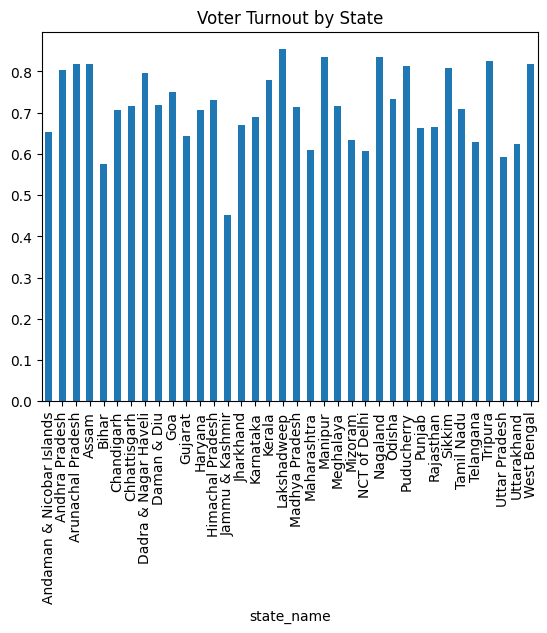

In [63]:


# Task 5: Calculate the voter turnout rate for each state by dividing the total actual votes by the total number of electors. Create a bar chart to compare the turnout rates across different states.
votes_df['turnout_rate'] = votes_df.total_actual_votes / votes_df.total_electors
turnout_by_state = votes_df.groupby('state_name').turnout_rate.mean()
turnout_by_state.plot(kind='bar', title='Voter Turnout by State')
plt.show()


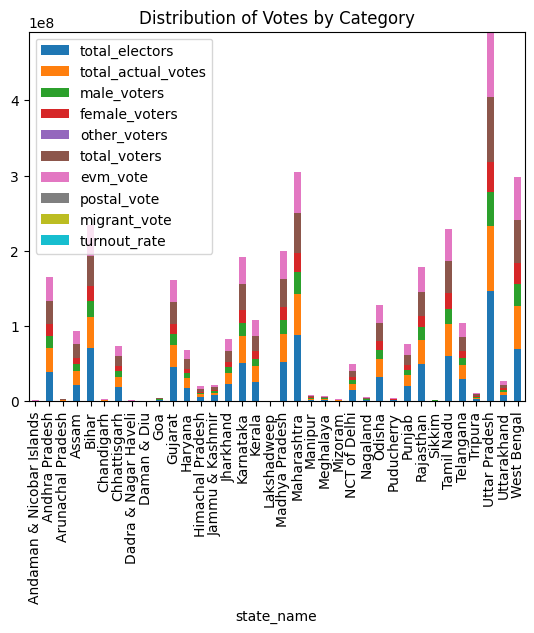

In [64]:

# Task 6: Analyze the distribution of EVM vote, postal vote, and migrant vote across different states. Create a stacked bar chart to show the proportion of each category for each state.
votes_by_category = votes_df.groupby('state_name').sum()
votes_by_category.plot(kind='bar', stacked=True, title='Distribution of Votes by Category')
plt.show()


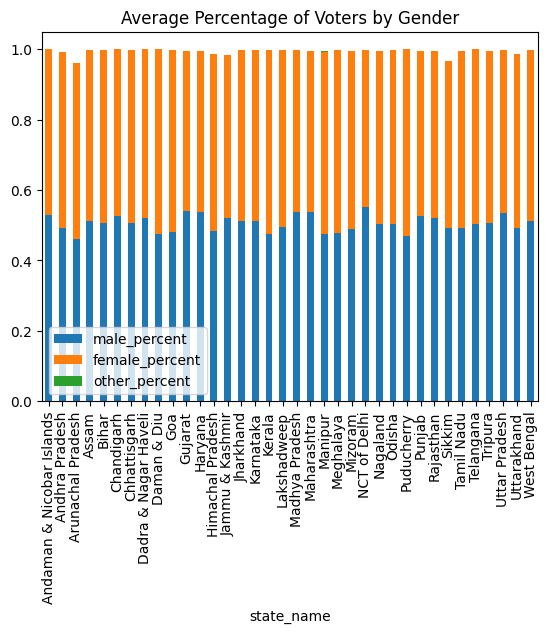

In [65]:

# Task 7: Calculate the average number of male, female, and other voters per state. Create a bar chart to compare the average number of voters across different states in ascending order
votes_df['male_percent'] = votes_df.male_voters / votes_df.total_actual_votes
votes_df['female_percent'] = votes_df.female_voters / votes_df.total_actual_votes
votes_df['other_percent'] = votes_df.other_voters / votes_df.total_actual_votes
voters_by_state = votes_df.groupby('state_name').mean()

# plot in ascending order
voters_by_state[['male_percent', 'female_percent', 'other_percent']].plot(kind='bar', title='Average Percentage of Voters by Gender', stacked=True)

plt.show()


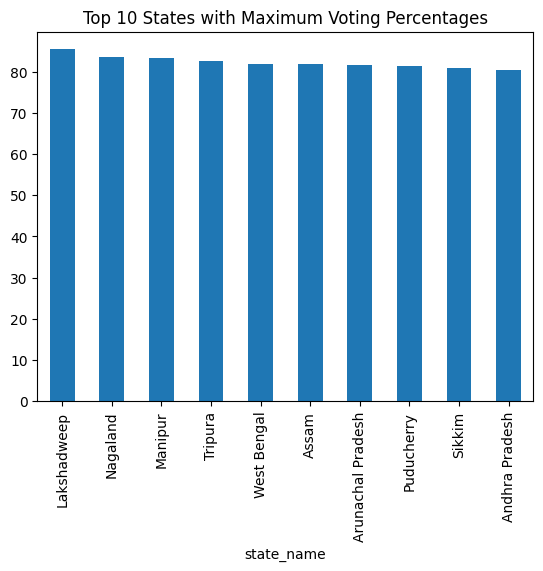

In [66]:

# Task 8: Determine the top 10 states with maximum total voting percentages (total actual voters/total electors) and plot a bar chart representing the same.
votes_df['voting_percentage'] = (votes_df.total_actual_votes / votes_df.total_electors) * 100
voting_pct_by_state = votes_df.groupby('state_name').voting_percentage.mean().sort_values(ascending=False)[:10]
voting_pct_by_state.plot(kind='bar', title='Top 10 States with Maximum Voting Percentages')
plt.show()


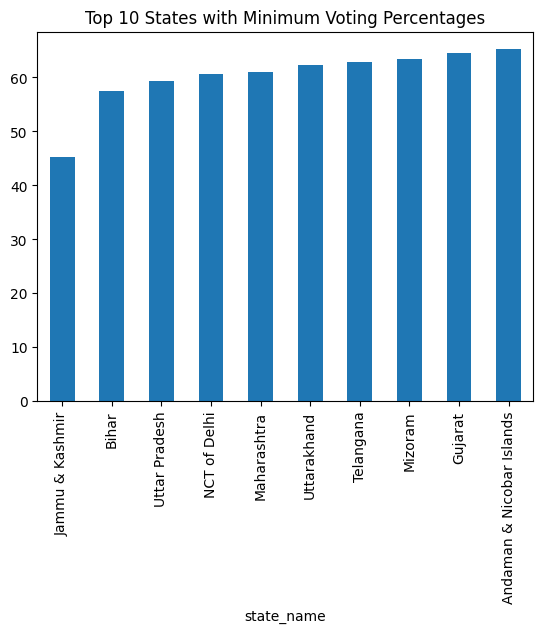

In [67]:
# Task 9: Determine the top 10 states with minimum total voting percentages (total actual voters/total electors) and plot a bar chart representing the same.
voting_pct_by_state = votes_df.groupby('state_name').voting_percentage.mean().sort_values(ascending=True)[:10]
voting_pct_by_state.plot(kind='bar', title='Top 10 States with Minimum Voting Percentages')
plt.show()


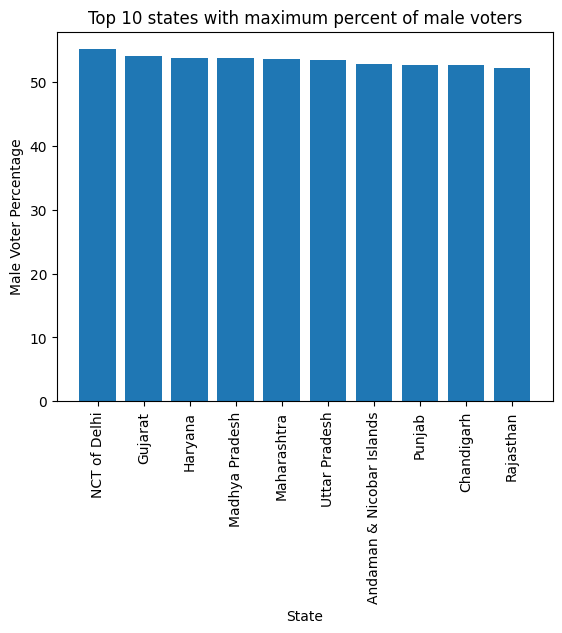

In [68]:
# Task 10: Determine the top 10 states with the maximum total percent of male voters
votes_df['male_percent'] = (votes_df.male_voters / votes_df.total_actual_votes) * 100
top_male_states = votes_df.nlargest(10, 'male_percent')


# Plotting the bar chart for top 10 states with the maximum total percent of male voters
plt.bar(top_male_states['state_name'], top_male_states['male_percent'])
plt.title('Top 10 states with maximum percent of male voters')
plt.xlabel('State')
plt.ylabel('Male Voter Percentage')
plt.xticks(rotation=90)
plt.show()

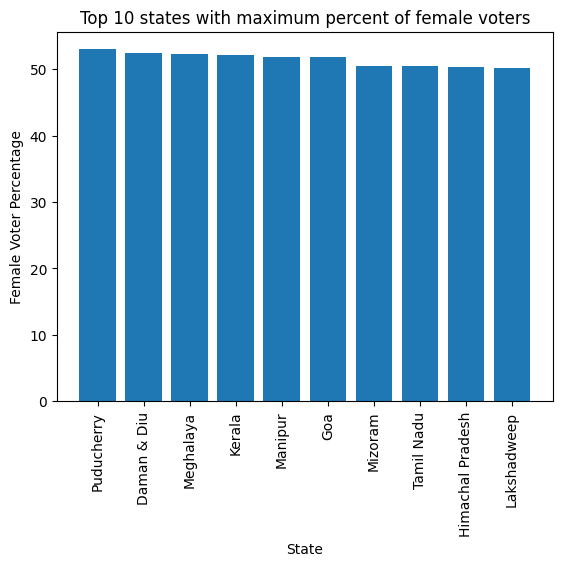

In [69]:
# Task 11: Determine the top 10 states with the maximum total percent of female voters
votes_df['female_percent'] = (votes_df.female_voters / votes_df.total_actual_votes) * 100
top_female_states = votes_df.nlargest(10, 'female_percent')

# Plotting the bar chart for top 10 states with the maximum total percent of female voters
plt.bar(top_female_states['state_name'], top_female_states['female_percent'])
plt.title('Top 10 states with maximum percent of female voters')
plt.xlabel('State')
plt.ylabel('Female Voter Percentage')
plt.xticks(rotation=90)
plt.show()

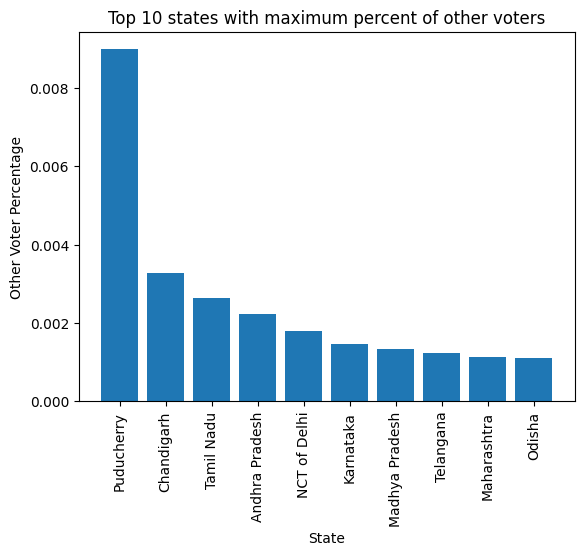

In [70]:
# Task 12: Determine the top 10 states with the maximum total percent of other voters
votes_df['other_percent'] = (votes_df.other_voters / votes_df.total_actual_votes) * 100
top_other_states = votes_df.nlargest(10, 'other_percent')

# Plotting the bar chart for top 10 states with the maximum total percent of other voters
plt.bar(top_other_states['state_name'], top_other_states['other_percent'])
plt.title('Top 10 states with maximum percent of other voters')
plt.xlabel('State')
plt.ylabel('Other Voter Percentage')
plt.xticks(rotation=90)
plt.show()

In [71]:
import os
os.environ['SHAPE_RESTORE_SHX'] = 'YES'

import geopandas as gpd
india_map = gpd.read_file("Indian_States.shp")


In [72]:
# Calculate the percentage of votes for each state
votes_df['vote_percentage'] = (votes_df['total_actual_votes'] / votes_df['total_electors']) * 100

# Rename the columns for consistency
votes_df = votes_df.rename(columns={'state_name': 'st_nm'})

# Replace the state/ut names to match with the shapefile
votes_df['state/ut'] = votes_df['st_nm'].replace({
    'Andaman & Nicobar Islands': 'Andaman & Nicobar Island',
    'Dadra & Nagar Haveli': 'Dadara & Nagar Havelli'
})

# Load the shapefile
shp_gdf = gpd.read_file('Indian_States.shp')

shp_gdf.head()

,st_nm,geometry
0,Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2..."
1,Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432..."
2,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26..."
3,Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24..."
4,Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623..."


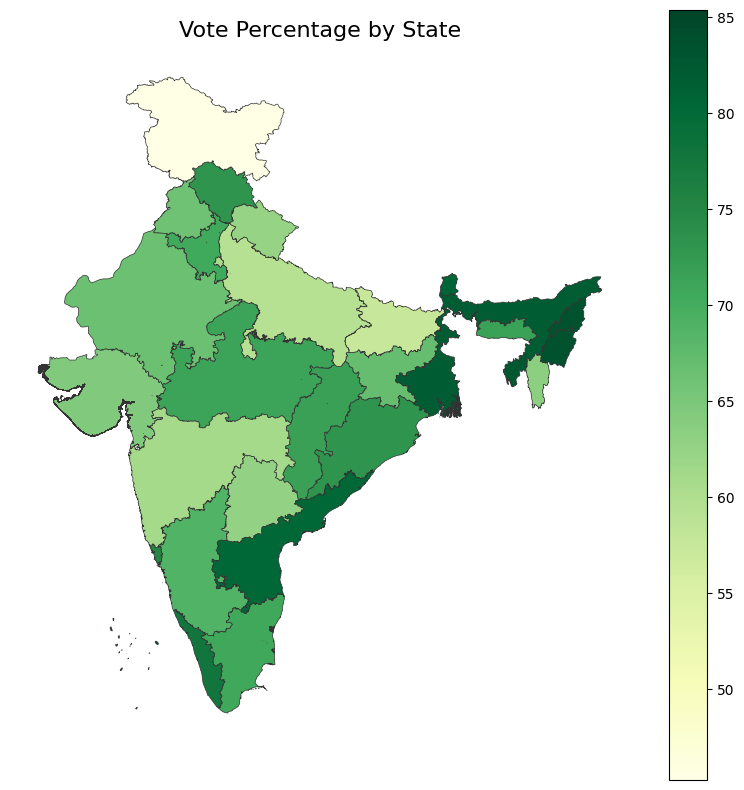

In [73]:
# Merge the vote data with the shapefile
merged_vote_percentage = shp_gdf.merge(votes_df, on='st_nm')

# Plot the choropleth map
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('Vote Percentage by State', fontsize=16)
merged_vote_percentage.plot(column='vote_percentage', cmap='YlGn', linewidth=0.5, edgecolor='0.2', ax=ax, legend=True, label='Vote_Percentage')

# Remove the axis ticks and labels
ax.set_xticks([])
ax.set_yticks([])
ax.axis('off')

# Show the plot
plt.show()

There is generally a positive correlation between literacy rates and voting rates in India. This is because literacy is an important factor in enabling people to understand the significance of participating in the democratic process and to make informed decisions when casting their votes. However, it is important to note that the relationship between literacy rates and voting rates is complex and may be influenced by a variety of other factors as well.

Data Source: https://data.gov.in/

Govt Of India Literacy Rate

In [74]:
#read the csv file
lit_rates_survey = pd.read_csv("GOI_literacy.csv")
lit_rates_survey.head()

,state_name,literacy_2001,literacy_2011,literacy_rural_2001,literacy_rural_2011,literacy_urban_2001,literacy_urban_2011
0,INDIA,64.8,73.0,58.7,67.8,79.9,84.1
1,Andhra Pradesh,60.5,67.0,54.5,60.4,76.1,80.1
2,Arunachal Pradesh,54.3,65.4,47.8,59.9,78.3,82.9
3,Assam,63.3,72.2,59.7,69.3,85.3,88.5
4,Bihar,47.0,61.8,43.9,59.8,71.9,76.9


In [75]:
voting_rates = pd.read_csv("Votes_2019.csv")
voting_rates.head()

,state_name,total_electors,total_actual_votes,male_voters,female_voters,other_voters,total_voters,evm_vote,postal_vote,migrant_vote
0,Andaman & Nicobar Islands,317878,207296,109407,97671,2,207080,207080,216,0
1,Andhra Pradesh,39345717,31607242,15567765,15818150,709,31386624,31380829,226413,0
2,Arunachal Pradesh,798249,652091,300798,326179,0,626977,626977,25114,0
3,Assam,21991112,17986066,9184449,8748413,23,17932885,17932885,53181,0
4,Bihar,71063555,40805297,20688548,19978743,53,40667344,40667344,137953,0


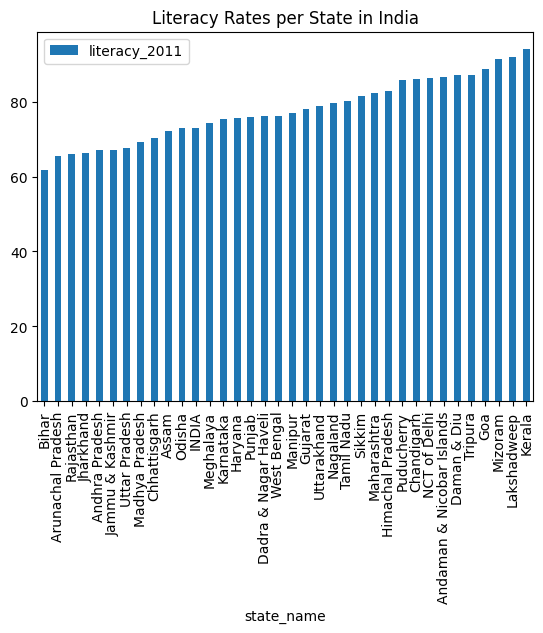

In [76]:

#clean the data
lit_rates_survey = lit_rates_survey.dropna()
lit_rates_survey = lit_rates_survey[lit_rates_survey['literacy_2011'] != '...']

# #convert the literacy rate to a float
# lit_rates_survey['Literacy Rate (Persons) - Total - 2011'] = lit_rates_survey['Literacy Rate (Persons) - Total - 2011'].astype(float)

#visualize the literacy rates per sate in India in ascending order
lit_rates_survey = lit_rates_survey.sort_values(by='literacy_2011', ascending=True)
lit_rates_survey.plot(kind='bar', x='state_name', y='literacy_2011', title='Literacy Rates per State in India')
plt.show()

(66.79450919227548, 97.41278479275405, 6.627825983047702, 38.528289110888835)

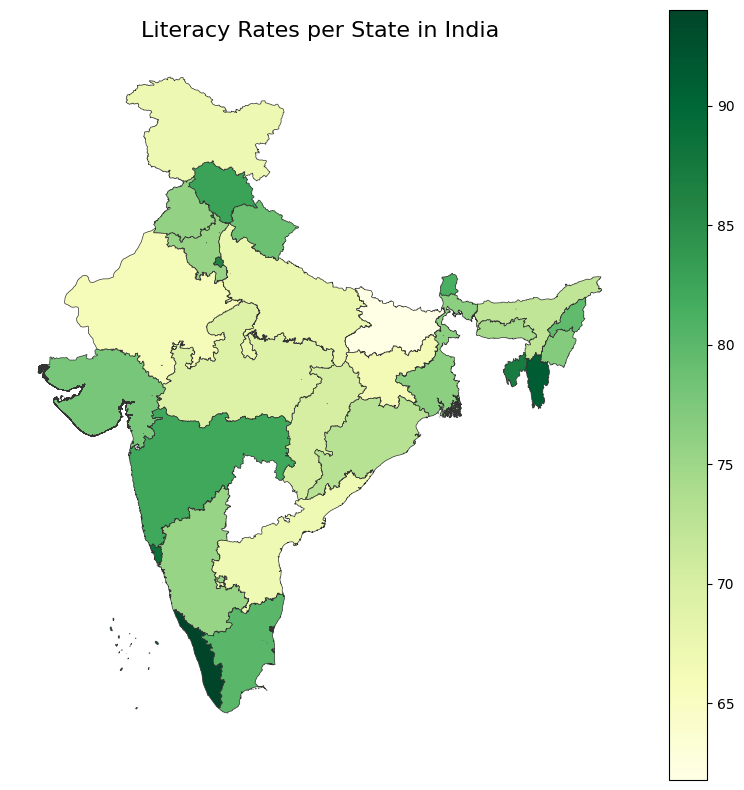

In [77]:
#merge the literacy rates with the shapefile
merged_lit_rates = shp_gdf.merge(lit_rates_survey, left_on='st_nm', right_on='state_name')

#plot the cloroopleth map
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('Literacy Rates per State in India', fontsize=16)
merged_lit_rates.plot(column='literacy_2011', cmap='YlGn', linewidth=0.5, edgecolor='0.2', ax=ax, legend=True, label='literacy_2011')

# Remove the axis ticks and labels
ax.set_xticks([])
ax.set_yticks([])
ax.axis('off')


In [78]:
#calculate voting rates per state
voting_rates['vote_percentage'] = ( voting_rates['total_actual_votes']/voting_rates['total_electors']) * 100

In [79]:
#calculate and plot the mean, median, and standard deviation of literacy per state
lit_rates_survey['literacy_2011'] = lit_rates_survey['literacy_2011'].astype(float)

#Print the mean
print('The Mean of the Literacy rate is:',lit_rates_survey['literacy_2011'].mean())
#Print the median
print('The Median of the Literacy rate is:', lit_rates_survey['literacy_2011'].median())
#Print the standard deviation
print('The Standard Deviation of the Literacy rate is:', lit_rates_survey['literacy_2011'].std())

The Mean of the Literacy rate is: 77.71111111111112
The Median of the Literacy rate is: 76.6
The Standard Deviation of the Literacy rate is: 8.497723317883535


In [80]:
#calculate and plot the mean, median, and standard deviation of voting rates per state
voting_rates['vote_percentage'] = voting_rates['vote_percentage'].astype(float)

#Print the mean
print('The Mean of the Voting rate is:',voting_rates['vote_percentage'].mean())
#Print the median
print('The Median of the Voting rate is:', voting_rates['vote_percentage'].median())
#Print the standard deviation
print('The Standard Deviation of the Voting rate is:', voting_rates['vote_percentage'].std())


The Mean of the Voting rate is: 71.3983757899063
The Median of the Voting rate is: 71.39736777252119
The Standard Deviation of the Voting rate is: 9.19966538600988


In [81]:
#create a new dataset with state_name literacy_2011 and vote_percentage
new_data = voting_rates[['state_name', 'vote_percentage']]
new_data['literacy_rate'] = lit_rates_survey['literacy_2011']

new_data.head()


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17156\1599048632.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['literacy_rate'] = lit_rates_survey['literacy_2011']


,state_name,vote_percentage,literacy_rate
0,Andaman & Nicobar Islands,65.212440,73.0
1,Andhra Pradesh,80.332103,67.0
2,Arunachal Pradesh,81.690174,65.4
3,Assam,81.787888,72.2
4,Bihar,57.420850,61.8


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17156\1833894337.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  new_data.corr()


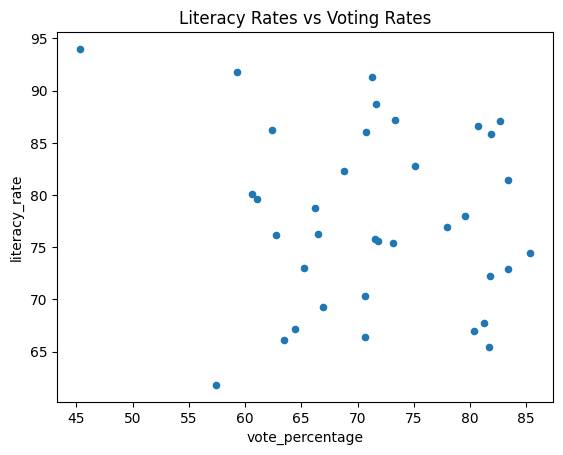

In [82]:
#coorelation between literacy and voting rates of each state
new_data.corr()

#plotTING the coorelation between literacy and voting rates
new_data.plot(kind='scatter', x='vote_percentage', y='literacy_rate', title='Literacy Rates vs Voting Rates')
plt.show()


In [83]:
#calculate the p value statistically
from scipy.stats import ttest_ind
ttest_ind(new_data['vote_percentage'], new_data['literacy_rate'])


Ttest_indResult(statistic=-3.024358648152237, pvalue=0.003481833983793847)

The mean of the literacy rate is: 77.71111111111111
The mean of the voting rate is: 71.3983757899063
The standard deviation of the literacy rate is: 8.497723317883537
The standard deviation of the voting rate is: 9.19966538600988
The standard error of the literacy rate is: 1.4162872196472562
The standard error of the voting rate is: 1.5332775643349799
The t-statistic is: -3.024358648152237
The p-value is: 0.9976778484160871
The t-critical value is: 1.6895724539637709
The confidence interval is: [-9.83937516 -2.78609548]


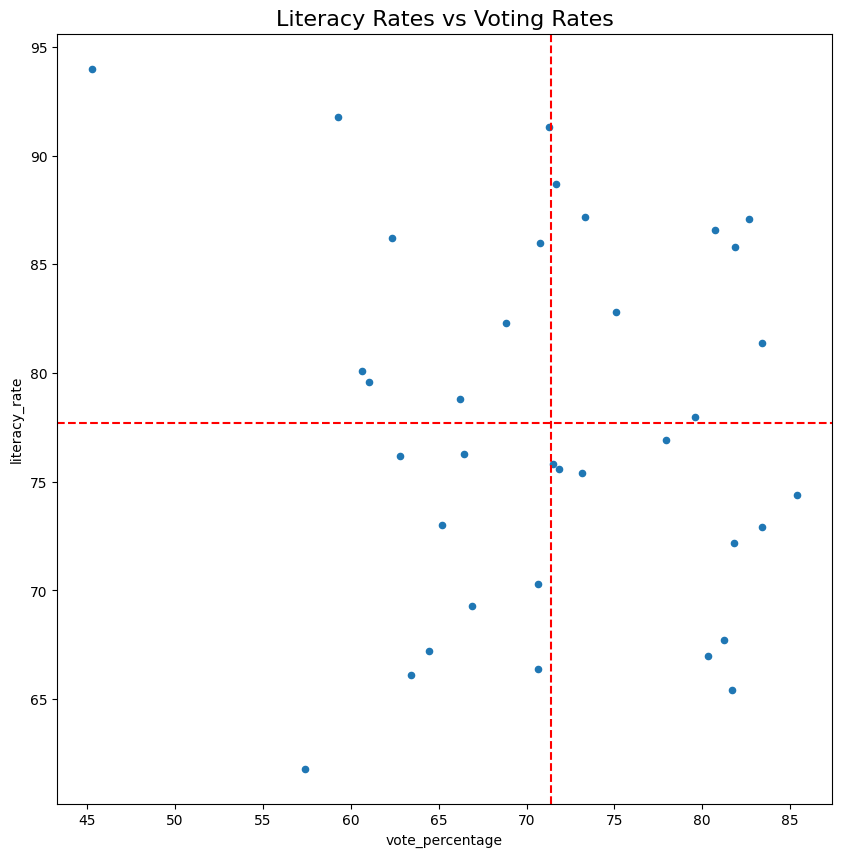

In [84]:
#Perform the t-test step by step
#calculate the mean of the literacy rate
literacy_mean = new_data['literacy_rate'].mean()
print('The mean of the literacy rate is:', literacy_mean)

#calculate the mean of the voting rate
voting_mean = new_data['vote_percentage'].mean()
print('The mean of the voting rate is:', voting_mean)

#calculate the standard deviation of the literacy rate
literacy_std = new_data['literacy_rate'].std()
print('The standard deviation of the literacy rate is:', literacy_std)

#calculate the standard deviation of the voting rate
voting_std = new_data['vote_percentage'].std()
print('The standard deviation of the voting rate is:', voting_std)

#calculate the standard error of the literacy rate
literacy_se = literacy_std / np.sqrt(len(new_data['literacy_rate']))
print('The standard error of the literacy rate is:', literacy_se)

#calculate the standard error of the voting rate
voting_se = voting_std / np.sqrt(len(new_data['vote_percentage']))
print('The standard error of the voting rate is:', voting_se)

#calculate the t-statistic
t_statistic = (voting_mean - literacy_mean) / np.sqrt(voting_se**2 + literacy_se**2)
print('The t-statistic is:', t_statistic)

#calculate the p-value
p_value = 1 - stats.t.cdf(t_statistic, df=len(new_data['vote_percentage'])-1)
print('The p-value is:', p_value)

#calculate the t-critical value
t_critical = stats.t.ppf(0.95, df=len(new_data['vote_percentage'])-1)
print('The t-critical value is:', t_critical)

#calculate the confidence interval
confidence_interval = (voting_mean - literacy_mean) + np.array([-1, 1]) * t_critical * np.sqrt(voting_se**2 + literacy_se**2)
print('The confidence interval is:', confidence_interval)

#plot the t-test
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('Literacy Rates vs Voting Rates', fontsize=16)
new_data.plot(kind='scatter', x='vote_percentage', y='literacy_rate', ax=ax)
ax.axhline(y=literacy_mean, color='r', linestyle='--')
ax.axvline(x=voting_mean, color='r', linestyle='--')


In [85]:

if p_value < 0.05:    # alpha value is 0.05 or 5%
   print(" we are rejecting null hypothesis")
else:
  print("we are accepting null hypothesis")


we are accepting null hypothesis


The f-statistic is: 9.146745232653256
The p-value is: 0.0034818339837938165
Conclusion: alpha greater than p, Reject null hypothesis - There is a significant association between vote_percentage and literacy_rate.


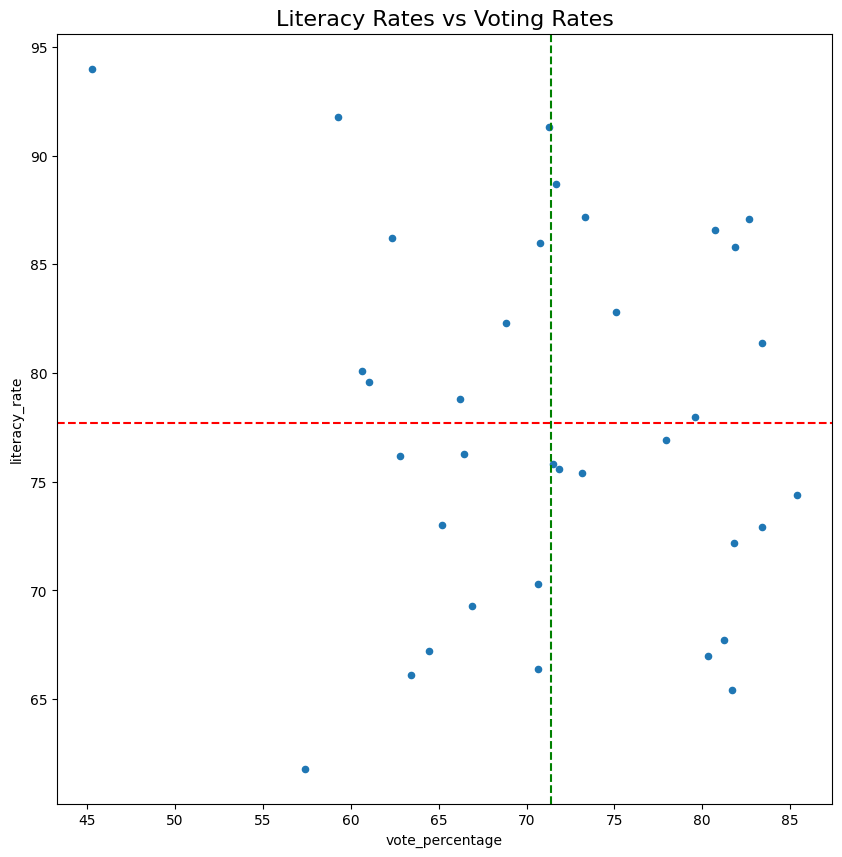

In [86]:
#performing ANOVA test
from scipy.stats import f_oneway
f_statistic, p_value = f_oneway(new_data['vote_percentage'], new_data['literacy_rate'])
print('The f-statistic is:', f_statistic)
print('The p-value is:', p_value)

#plot the anova test
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('Literacy Rates vs Voting Rates', fontsize=16)
new_data.plot(kind='scatter', x='vote_percentage', y='literacy_rate', ax=ax)
ax.axhline(y=literacy_mean, color='r', linestyle='--')
ax.axvline(x=voting_mean, color='g', linestyle='--')



#drawing the conclusion
alpha = 0.05
if p_value < alpha:
    print("Conclusion: alpha greater than p, Reject null hypothesis - There is a significant association between vote_percentage and literacy_rate.")
else:
    print("Conclusion: alpha less than p, Fail to reject null hypothesis - There is no significant association between vote_percentage and literacy_rate.")

#this means that there is a statistically significant relationship between literacy and voting rates



According to data from the Election Commission of India, states with higher literacy rates tend to have higher voter turnout rates. For example, in the 2019 Lok Sabha elections, the state of Kerala, which has one of the highest literacy rates in India at around 96%, had a voter turnout of around 77%, which was the highest in the country. Similarly, the states of Mizoram, Goa, and Delhi, which also have high literacy rates, had voter turnout rates above 70%.

On the other hand, states with lower literacy rates tend to have lower voter turnout rates. For example, in the 2019 Lok Sabha elections, the state of Bihar, which has one of the lowest literacy rates in India at around 63%, had a voter turnout of around 58%, which was one of the lowest in the country. Similarly, the states of Jharkhand, Uttar Pradesh, and Rajasthan, which also have low literacy rates, had voter turnout rates below 65%.

However, it is important to note that literacy rates alone cannot fully explain the differences in voting rates among Indian states. Other factors such as socioeconomic status, political awareness, and access to information and resources may also play a role in determining voter turnout rates.




